In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
d1 = pd.read_excel('Data.xlsx')
d1

,Order_ID,TAKEAWAY/SEATING/PICKUP,DATE,DAY,TIME,SERVER,ITEM,QUANTITY,PRICE,TOTAL,ALLERGIES,FOOD TYPE,WEEK NUMBER
0,139017,SEAT,2020-06-19,FRIDAY,16:02:00,JILLIAN N.,FISH & CHIPS 2 PIECE,1,22,22,NO,ENTRÉE,WEEK 1
1,138938,SEAT,2020-06-19,FRIDAY,11:29:00,ASHLEY C.,FAST FARE BREAKFAST,1,10,10,NO,BREAKFAST,WEEK 1
2,138938,SEAT,2020-06-19,FRIDAY,11:29:00,ASHLEY C.,CHIC COBB SALAD SMALL,1,14,14,NO,SALAD,WEEK 1
3,138938,SEAT,2020-06-19,FRIDAY,11:29:00,ASHLEY C.,THAI PRAWN SALAD LARGE,1,18,18,NO,SALAD,WEEK 1
4,138908,TAKEAWAY,2020-06-19,FRIDAY,09:46:00,ASHLEY C.,FAST FARE BREAKFAST,1,10,10,NO,BREAKFAST,WEEK 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,146238,SEAT,2020-07-22,WEDNESDAY,12:49:00,JILLIAN N.,CHICKEN GYOZA,1,14,14,NO,STARTERS,WEEK 5
1537,146238,SEAT,2020-07-22,WEDNESDAY,12:49:00,JILLIAN N.,SALT & PEPPER PORK RIBS,1,14,14,NO,STARTERS,WEEK 5
1538,146254,TAKEAWAY,2020-07-22,WEDNESDAY,13:19:00,DEB D.,CHICKEN WINGS,2,14,28,NO,STARTERS,WEEK 5
1539,146254,TAKEAWAY,2020-07-22,WEDNESDAY,13:19:00,DEB D.,CHICKEN GYOZA,1,14,14,NO,STARTERS,WEEK 5


In [4]:
d2 = d1[['Order_ID', 'DATE', 'DAY','TIME','TOTAL','WEEK NUMBER']]
d2

,Order_ID,DATE,DAY,TIME,TOTAL,WEEK NUMBER
0,139017,2020-06-19,FRIDAY,16:02:00,22,WEEK 1
1,138938,2020-06-19,FRIDAY,11:29:00,10,WEEK 1
2,138938,2020-06-19,FRIDAY,11:29:00,14,WEEK 1
3,138938,2020-06-19,FRIDAY,11:29:00,18,WEEK 1
4,138908,2020-06-19,FRIDAY,09:46:00,10,WEEK 1
...,...,...,...,...,...,...
1536,146238,2020-07-22,WEDNESDAY,12:49:00,14,WEEK 5
1537,146238,2020-07-22,WEDNESDAY,12:49:00,14,WEEK 5
1538,146254,2020-07-22,WEDNESDAY,13:19:00,28,WEEK 5
1539,146254,2020-07-22,WEDNESDAY,13:19:00,14,WEEK 5


In [37]:
d2['Order_ID'].nunique()


686

In [5]:
group = d2.groupby('Order_ID')
d3 = group['TOTAL'].agg([np.sum])
d3

,sum
Order_ID,
138908,22
138918,10
138923,12
138933,81
138935,8
...,...
146273,15
146274,61
146275,33


In [6]:
group2 = d2.groupby('DATE')
d4 = group2['TOTAL'].agg([np.sum])
d4

,sum
DATE,
2020-06-19,493
2020-06-20,694
2020-06-21,700
2020-06-24,537
2020-06-25,843
2020-06-26,998
2020-06-27,860
2020-06-28,453
2020-06-29,306


In [7]:
group3 = d2.groupby('WEEK NUMBER')
d5 = group3['TOTAL'].agg([np.sum])
d5

,sum
WEEK NUMBER,
WEEK 1,3267
WEEK 2,4313
WEEK 3,5541
WEEK 4,4850
WEEK 5,4763


In [8]:
group4 = d2.groupby('DAY')
d6 = group4['TOTAL'].agg([np.sum])

d6 = d6.loc[['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY'], :]
d6

,sum
DAY,
MONDAY,2241
TUESDAY,3935
WEDNESDAY,3192
THURSDAY,1978
FRIDAY,4731
SATURDAY,3518
SUNDAY,3139


In [38]:
d6['Cumulative Revenue'] = d6['sum'].cumsum()
d6['Cumulative Percentage'] = 100*d6['Cumulative Revenue']/d6['sum'].sum()
d3['Cumulative Revenue'] = d3['sum'].cumsum()
d3['Cumulative Percentage'] = 100*d3['Cumulative Revenue']/d3['sum'].sum()
d4['Cumulative Revenue'] = d4['sum'].cumsum()
d4['Cumulative Percentage'] = 100*d4['Cumulative Revenue']/d4['sum'].sum()
d5['Cumulative Revenue'] = d5['sum'].cumsum()
d5['Cumulative Percentage'] = 100*d5['Cumulative Revenue']/d5['sum'].sum()

In [10]:
d3['Cumulative Revenue'] = d3['sum'].cumsum()
d3['Cumulative Percentage'] = 100*d3['Cumulative Revenue']/d3['sum'].sum()

In [11]:
d4['Cumulative Revenue'] = d4['sum'].cumsum()
d4['Cumulative Percentage'] = 100*d4['Cumulative Revenue']/d4['sum'].sum()

In [12]:
d5['Cumulative Revenue'] = d5['sum'].cumsum()
d5['Cumulative Percentage'] = 100*d5['Cumulative Revenue']/d5['sum'].sum()

In [13]:
d3

,sum,Cumulative Revenue,Cumulative Percentage
Order_ID,,,
138908,22,22,0.096771
138918,10,32,0.140758
138923,12,44,0.193543
138933,81,125,0.549837
138935,8,133,0.585027
...,...,...,...
146273,15,22596,99.392980
146274,61,22657,99.661300
146275,33,22690,99.806457


In [14]:
d6


,sum,Cumulative Revenue,Cumulative Percentage
DAY,,,
MONDAY,2241,2241,9.857482
TUESDAY,3935,6176,27.166359
WEDNESDAY,3192,9368,41.207003
THURSDAY,1978,11346,49.907627
FRIDAY,4731,16077,70.717868
SATURDAY,3518,19595,86.192487
SUNDAY,3139,22734,100.000000


In [15]:
d4

,sum,Cumulative Revenue,Cumulative Percentage
DATE,,,
2020-06-19,493,493,2.168558
2020-06-20,694,1187,5.221255
2020-06-21,700,1887,8.300343
2020-06-24,537,2424,10.662444
2020-06-25,843,3267,14.370546
2020-06-26,998,4265,18.760447
2020-06-27,860,5125,22.543327
2020-06-28,453,5578,24.535937
2020-06-29,306,5884,25.881939


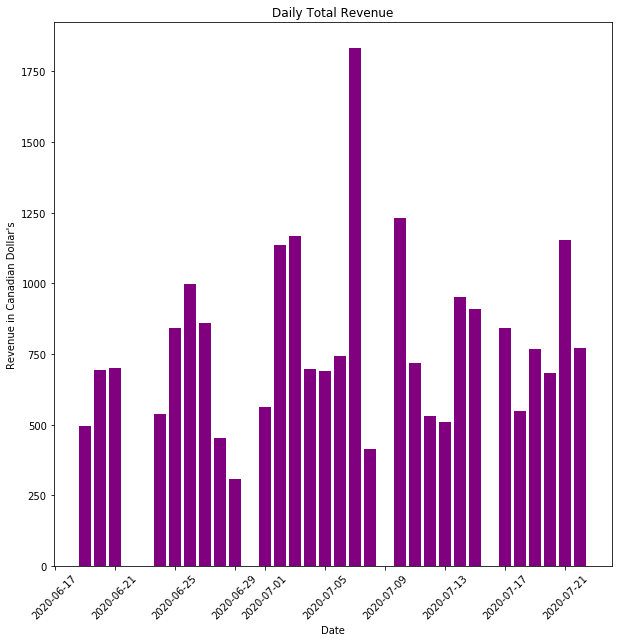

In [26]:

fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(d4.index.values,
        d4['sum'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Revenue in Canadian Dollar's",
       title="Daily Total Revenue")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)



plt.show()

In [17]:
d5

,sum,Cumulative Revenue,Cumulative Percentage
WEEK NUMBER,,,
WEEK 1,3267,3267,14.370546
WEEK 2,4313,7580,33.342131
WEEK 3,5541,13121,57.715316
WEEK 4,4850,17971,79.049001
WEEK 5,4763,22734,100.000000


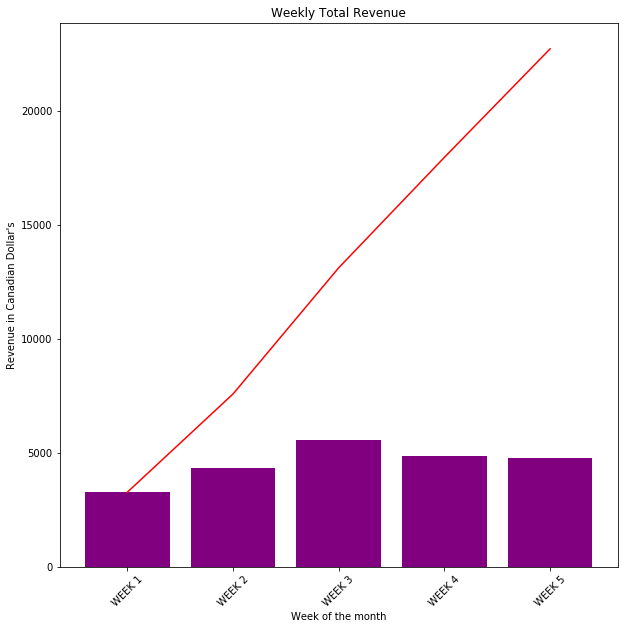

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(d5.index.values,
        d5['sum'],
        color='purple')
ax.plot(d5.index.values, d5['Cumulative Revenue'], color = 'red')
# Set title and labels for axes
ax.set(xlabel="Week of the month",
       ylabel="Revenue in Canadian Dollar's",
       title="Weekly Total Revenue")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)



plt.show()

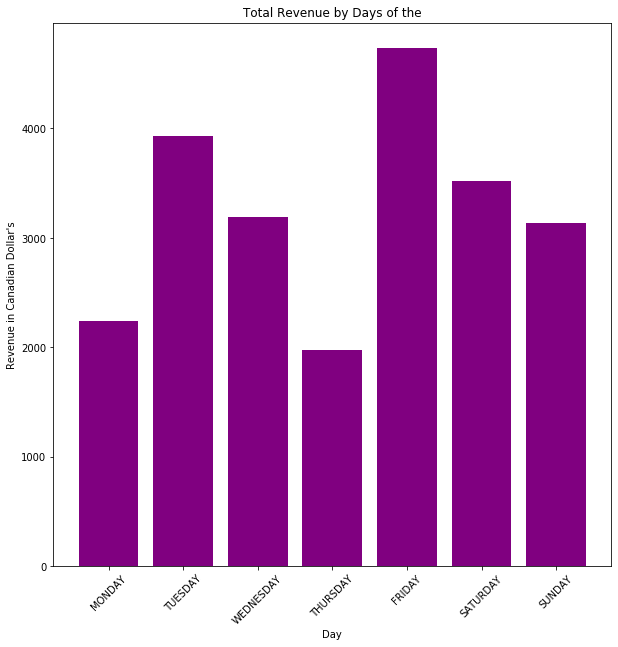

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(d6.index.values,
        d6['sum'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Day",
       ylabel="Revenue in Canadian Dollar's",
       title="Total Revenue by Days of the")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)



plt.show()

In [39]:
784

784

In [40]:
1492

1492